# Display the results

In [1]:
import gymnasium as gym
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load saved data
rewards_base = pd.read_csv('stats'+ os.sep +'reward_list_base.csv', index_col=0)
Q_base = pd.read_csv('stats'+ os.sep +'Q_base.csv', index_col=0)
test_base = pd.read_csv('stats'+ os.sep +'test_base.csv', index_col=0)

rewards_ext = pd.read_csv('stats'+ os.sep +'reward_list_ext.csv', index_col=0)
Q_ext = pd.read_csv('stats'+ os.sep +'Q_ext.csv', index_col=0)
test_ext = pd.read_csv('stats'+ os.sep +'test_ext.csv', index_col=0)

## Base Taxi-v3 Environment

In [3]:
env = gym.make("Taxi-v3", render_mode="ansi")

In [4]:
# get all the states inside the Q-table that have not been visited 
# (i.e. all values are 0)
Q_base_empty = Q_base[Q_base['0'] == 0]

print(Q_base_empty)

       0    1    2    3    4    5
0    0.0  0.0  0.0  0.0  0.0  0.0
5    0.0  0.0  0.0  0.0  0.0  0.0
10   0.0  0.0  0.0  0.0  0.0  0.0
15   0.0  0.0  0.0  0.0  0.0  0.0
20   0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...
475  0.0  0.0  0.0  0.0  0.0  0.0
480  0.0  0.0  0.0  0.0  0.0  0.0
485  0.0  0.0  0.0  0.0  0.0  0.0
490  0.0  0.0  0.0  0.0  0.0  0.0
495  0.0  0.0  0.0  0.0  0.0  0.0

[100 rows x 6 columns]


So we can see that in the base environment, the Q-learning agent never updated 100 states.

In [5]:
taxi_col, taxi_row, pass_idx, dest_idx = env.decode(Q_base_empty.index[-1])
print("Taxi column:", taxi_col, "Taxi row:", taxi_row, "Passenger index:", pass_idx, "Destination index:", dest_idx)

taxi_col, taxi_row, pass_idx, dest_idx = env.decode(Q_base_empty.index[-2])
print("Taxi column:", taxi_col, "Taxi row:", taxi_row, "Passenger index:", pass_idx, "Destination index:", dest_idx)

Taxi column: 4 Taxi row: 4 Passenger index: 3 Destination index: 3
Taxi column: 4 Taxi row: 4 Passenger index: 2 Destination index: 2


From these examples we can see that the agent NEVER reached a state where the *Passenger Location* was in the *Destination Location* and the taxi was somewhere else. This make sense since the episode ends when the taxi drops off the passenger in the correct location.

### Plots Training

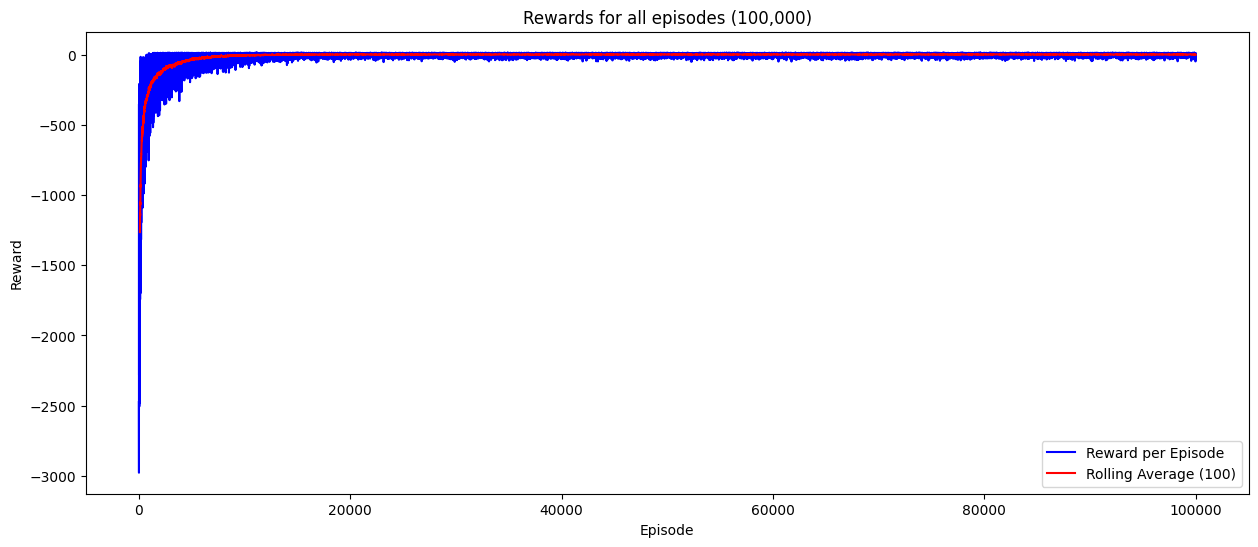

In [6]:
# plot the rewards over all episodes
plt.figure(figsize=(15,6))
plt.title("Rewards for all episodes (100,000)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards_base, color='blue', label='Reward per Episode')
plt.plot(rewards_base.rolling(100).mean(), color='red', label='Rolling Average (100)')
plt.legend()
plt.show()

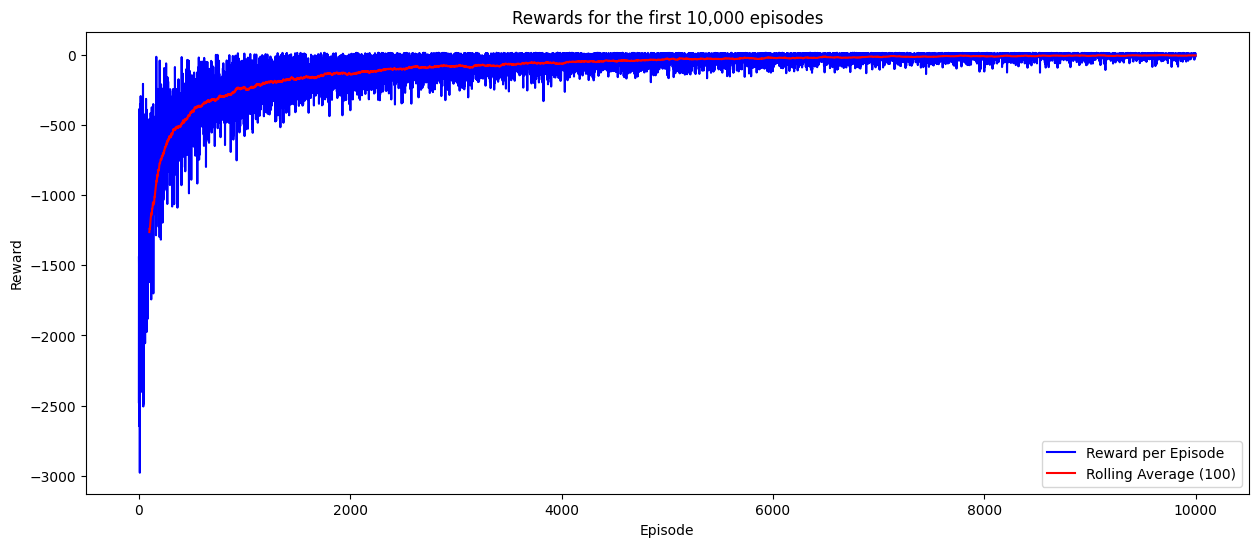

In [7]:
# plot the rewards for the first 10,000 episodes
plt.figure(figsize=(15,6))
plt.title("Rewards for the first 10,000 episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards_base[:10_000], color='blue', label='Reward per Episode')
plt.plot(rewards_base[:10_000].rolling(100).mean(), color='red', label='Rolling Average (100)')
plt.legend()
plt.show()

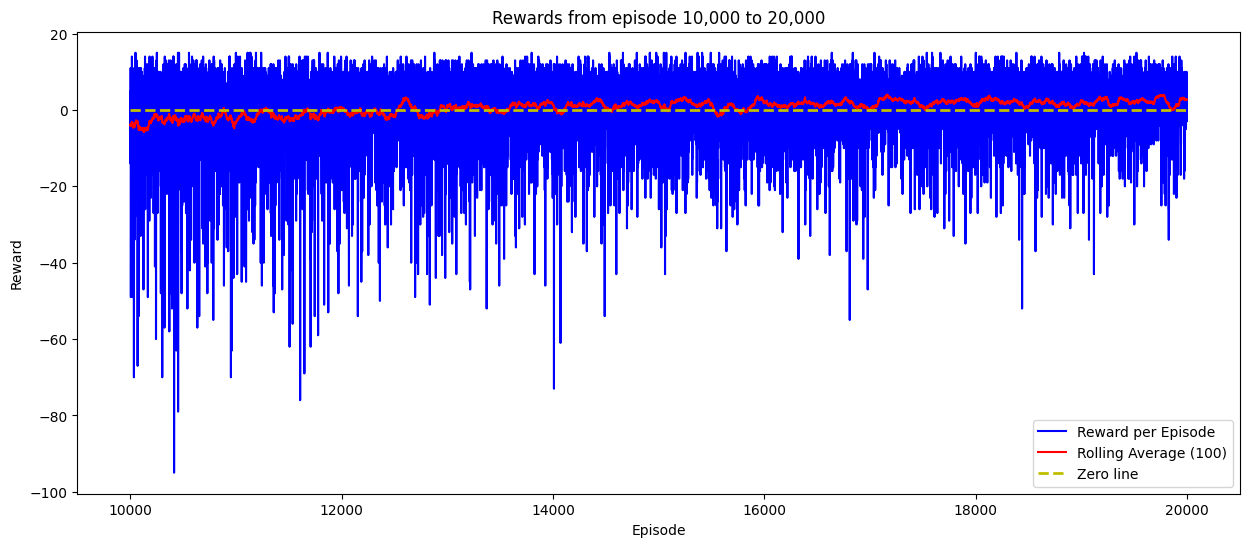

In [8]:
# plot the rewards from episode 10,000 to 20,000
plt.figure(figsize=(15,6))
plt.title("Rewards from episode 10,000 to 20,000")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards_base[10_000:20_000], color='blue', label='Reward per Episode')
plt.plot(rewards_base[9_900:20_000].rolling(100).mean(), color='red', label='Rolling Average (100)')
plt.hlines(y=0, xmin=10_000, xmax=20_000, linewidth=2, color='y', label='Zero line', linestyles='dashed')
plt.legend()
plt.show()

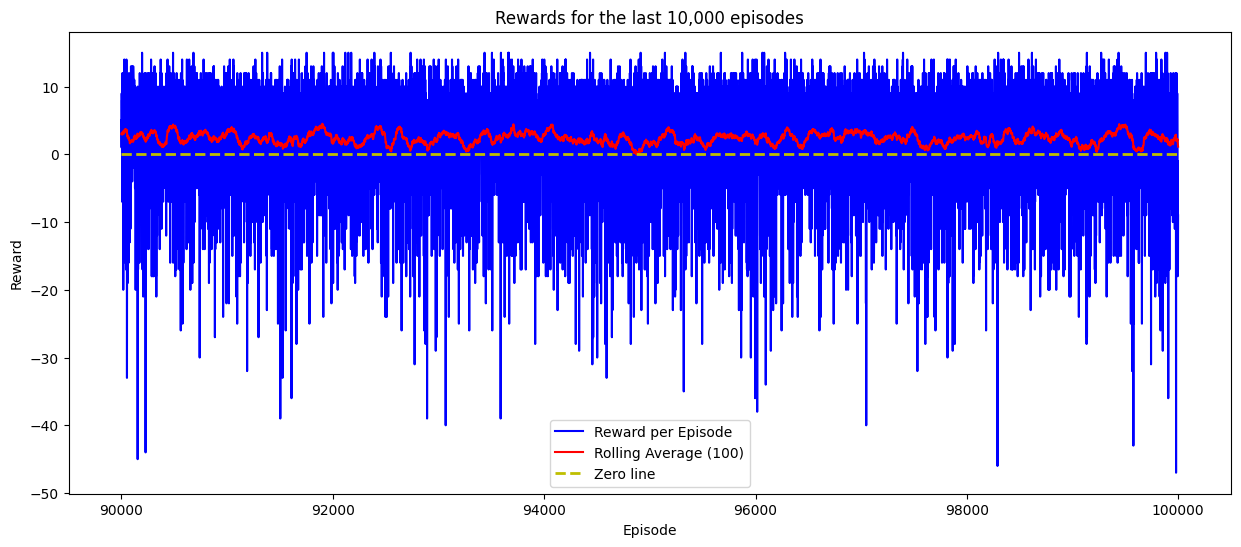

In [9]:
# plot the rewards for the last 10,000 episodes
plt.figure(figsize=(15,6))
plt.title("Rewards for the last 10,000 episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards_base[-10_000:], color='blue', label='Reward per Episode')
plt.plot(rewards_base[-10_100:].rolling(100).mean(), color='red', label='Rolling Average (100)')
plt.hlines(y=0, xmin=90_000, xmax=100_000, linewidth=2, color='y', label='Zero line', linestyles='dashed')
plt.legend()
plt.show()

From the last 2 plots we can see that the average reward per 100 episodes is increasing as the agent learns more about the environment. 
In the last 10,000 episodes the average reward is always over 0, which means that the agent is always getting a positive reward.

### Plots Testing

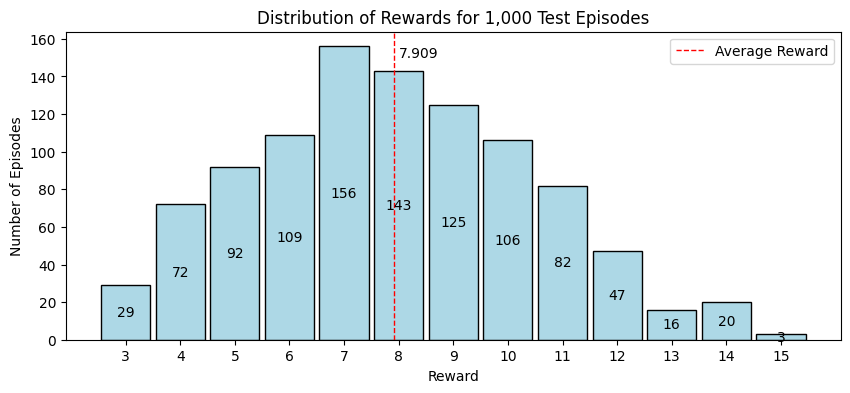

Episodes under 5 reward: 101
Average reward: 7.909


In [10]:
# plot the histogram of distribution of rewards for 1,000 Test Episodes
labels, counts = np.unique(test_base['Rewards'], return_counts=True)
mean = test_base['Rewards'].mean()
mean = round(mean, 4)

plt.figure(figsize=(10,4))
plt.title("Distribution of Rewards for 1,000 Test Episodes")
plt.xlabel("Reward")
plt.ylabel("Number of Episodes")

values = plt.bar(labels, counts, color='lightblue', ec='black', align='center', width=0.9)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Average Reward')
plt.text(mean+0.1, 150, mean)
plt.bar_label(values, label_type='center', color='black')
plt.legend()
plt.xticks(labels)

plt.show()

# print how many episodes are under 5 reward and the average reward
print("Episodes under 5 reward:", len(test_base[test_base['Rewards'] < 5]))
print("Average reward:", mean)

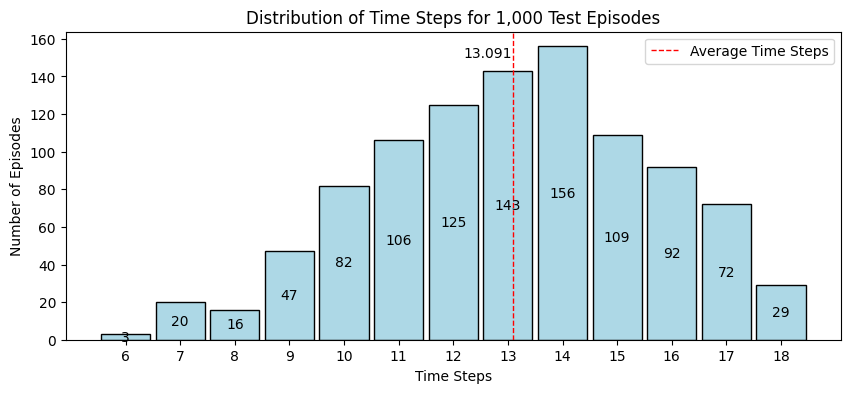

Episodes under 10 time steps: 86
Average time steps: 13.091


In [11]:
# plot the number of timesteps of 1,000 Test Episodes
labels, counts = np.unique(test_base['Timesteps'], return_counts=True)
mean = test_base['Timesteps'].mean()
mean = round(mean, 4)

plt.figure(figsize=(10,4))
plt.title("Distribution of Time Steps for 1,000 Test Episodes")
plt.xlabel("Time Steps")
plt.ylabel("Number of Episodes")


values = plt.bar(labels, counts, color='lightblue', ec='black', align='center', width=0.9)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Average Time Steps')
plt.text(mean-0.9, 150, mean)
plt.bar_label(values, label_type='center', color='black')
plt.legend()
plt.xticks(labels)

plt.show()

# print how many episodes are under 10 time steps and the average time steps
print("Episodes under 10 time steps:", len(test_base[test_base['Timesteps'] < 10]))
print("Average time steps:", mean)

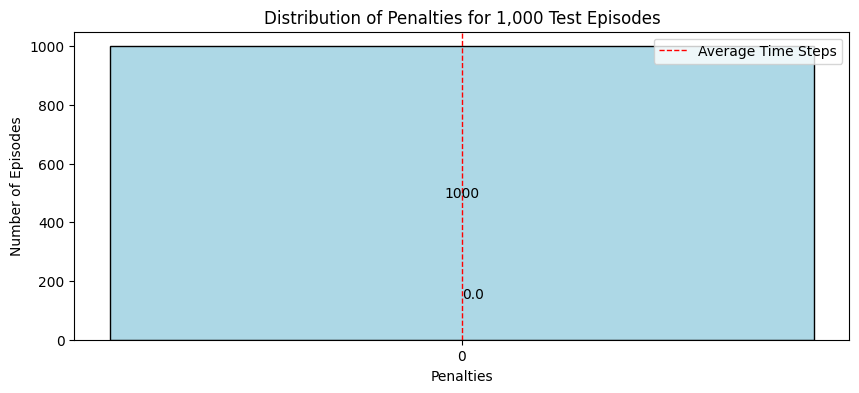

Episodes with no penalties: 1000
Average penalties: 0.0


In [12]:
# plot the number of penalties of 1,000 Test Episodes
labels, counts = np.unique(test_base['Penalties'], return_counts=True)
mean = test_base['Penalties'].mean()
mean = round(mean, 4)

plt.figure(figsize=(10,4))
plt.title("Distribution of Penalties for 1,000 Test Episodes")
plt.xlabel("Penalties")
plt.ylabel("Number of Episodes")

values = plt.bar(labels, counts, color='lightblue', ec='black', align='center', width=0.9)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Average Time Steps')
plt.text(mean, 140, mean)
plt.bar_label(values, label_type='center', color='black')
plt.legend()
plt.xticks(labels)

plt.show()

# print how many episodes have no penalties and the average penalties
print("Episodes with no penalties:", len(test_base[test_base['Penalties'] < 1]))
print("Average penalties:", mean)

From the previous 3 plots we can see that the agent is always getting a positive reward and never gets a penalty.

## Extended Taxi-v3 Environment

In [13]:
# get all the states inside the Q-table that have not been visited 
Q_ext_empty = Q_ext[Q_ext['0'] == 0]

print(Q_ext_empty)

          0    1    2    3    4    5    6
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...  ...
115495  0.0  0.0  0.0  0.0  0.0  0.0  0.0
115496  0.0  0.0  0.0  0.0  0.0  0.0  0.0
115497  0.0  0.0  0.0  0.0  0.0  0.0  0.0
115498  0.0  0.0  0.0  0.0  0.0  0.0  0.0
115499  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[37471 rows x 7 columns]


As we saw in the base environment, there are many states that are never visited by the agent. 

### Plots Training

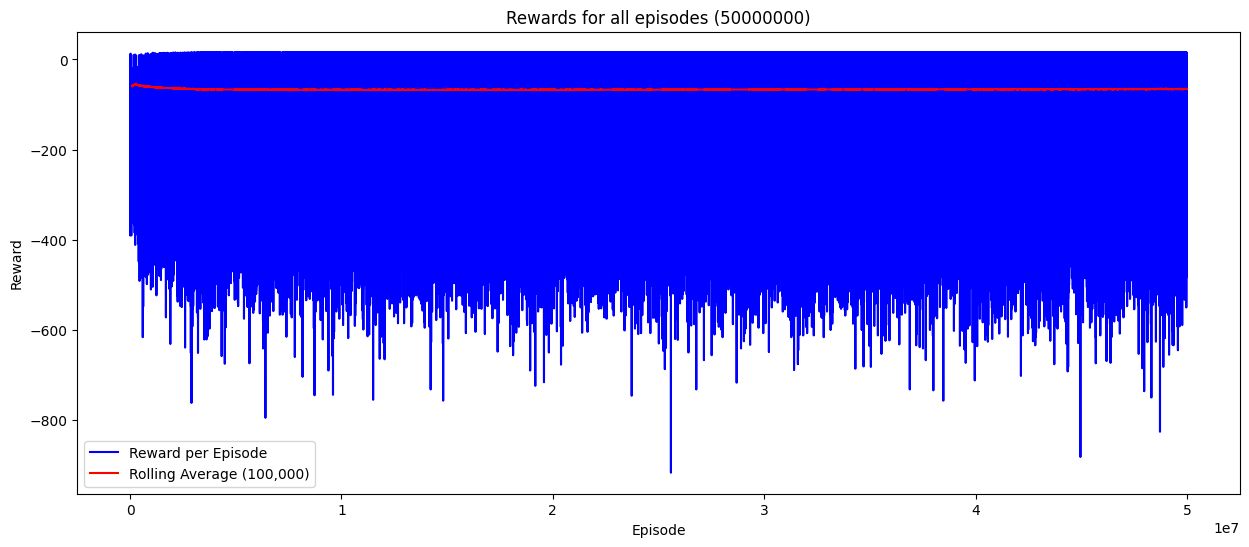

In [14]:
# plot the rewards over all episodes
plt.figure(figsize=(15,6))
plt.title(f"Rewards for all episodes ({len(rewards_ext)})")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards_ext, color='blue', label='Reward per Episode')
plt.plot(rewards_ext.rolling(100_000).mean(), color='red', label='Rolling Average (100,000)')
plt.legend()
plt.show()

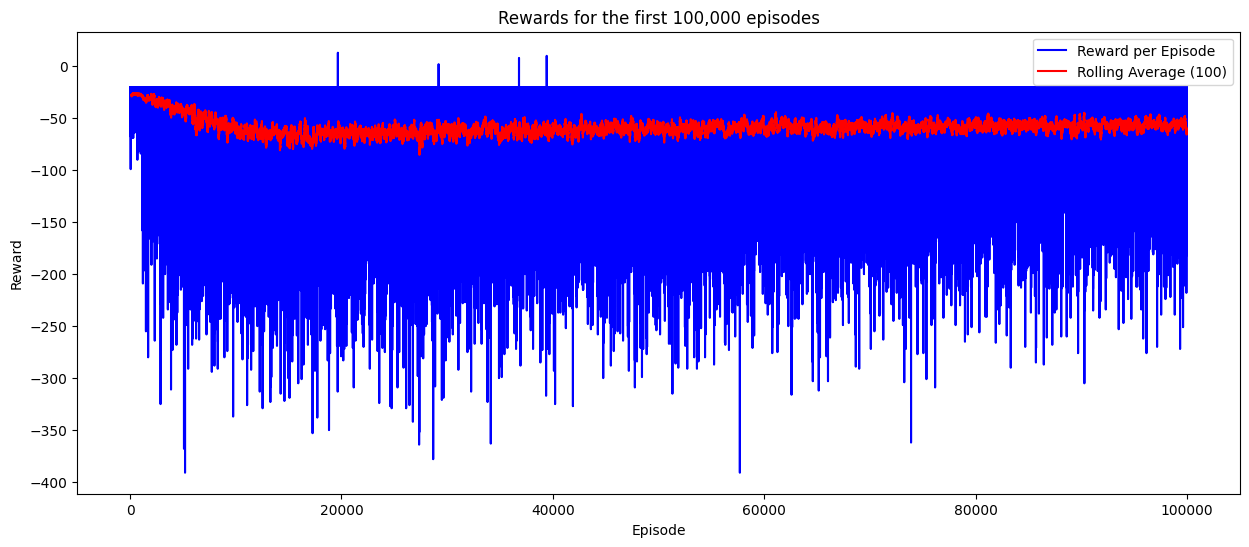

In [15]:
# plot the rewards over all episodes
plt.figure(figsize=(15,6))
plt.title("Rewards for the first 100,000 episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards_ext[:100_000], color='blue', label='Reward per Episode')
plt.plot(rewards_ext[:100_000].rolling(100).mean(), color='red', label='Rolling Average (100)')
plt.legend()
plt.show()

From this plot we can see that the average reward is way below the average reward of the base environment. This is because the agent needs to learn more about the environment and the number of episodes is not enough to learn a good policy.

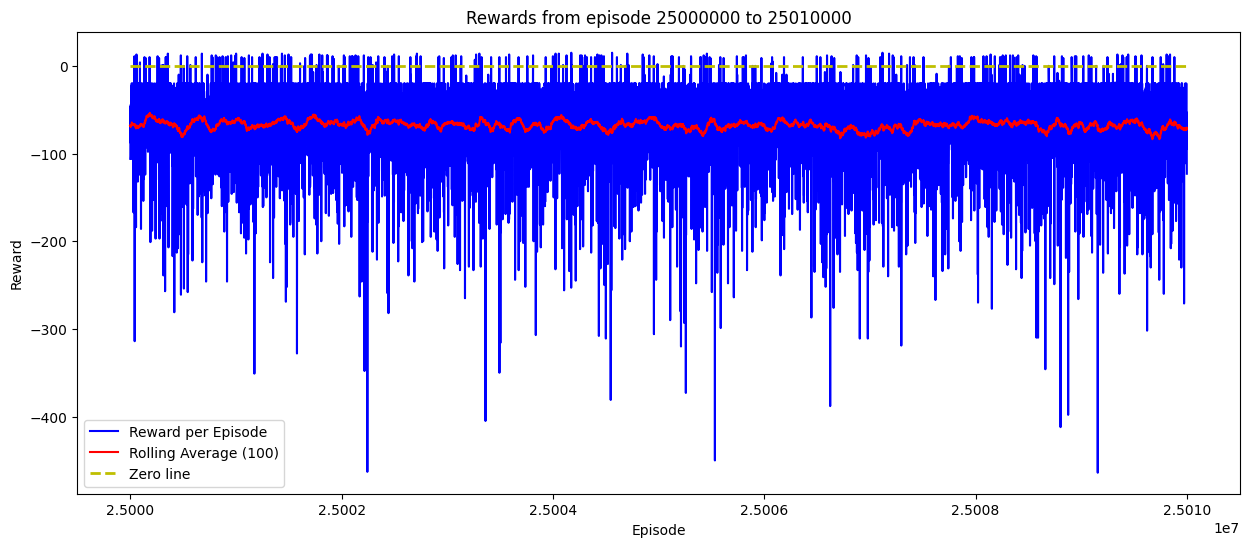

In [16]:
# plot the rewards at half of the episodes
range = len(rewards_ext)//2
plt.figure(figsize=(15,6))
plt.title(f"Rewards from episode {range} to {range+10_000}")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards_ext[range:range+10_000], color='blue', label='Reward per Episode')
plt.plot(rewards_ext[range-100:range+10_000].rolling(100).mean(), color='red', label='Rolling Average (100)')
plt.hlines(y=0, xmin=range, xmax=range+10_000, linewidth=2, color='y', label='Zero line', linestyles='dashed')
plt.legend()
plt.show()

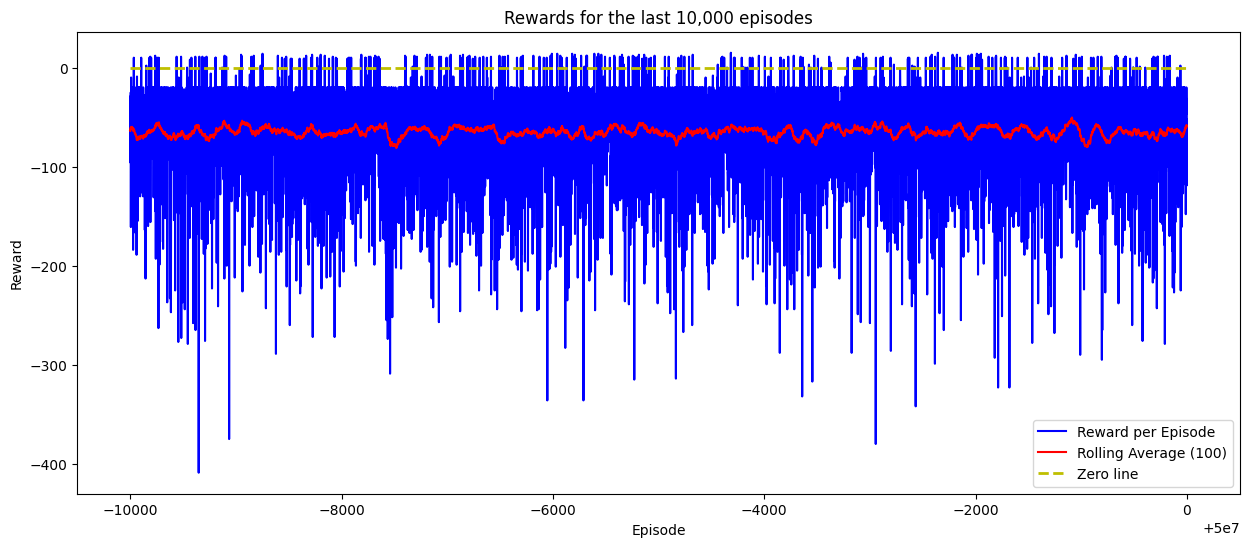

In [17]:
# plot the rewards for the last 10,000 episodes
range = 10_000
plt.figure(figsize=(15,6))
plt.title("Rewards for the last 10,000 episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(rewards_ext[-range:], color='blue', label='Reward per Episode')
plt.plot(rewards_ext[-range-100:].rolling(100).mean(), color='red', label='Rolling Average (100)')
plt.hlines(y=0, xmin=len(rewards_ext)-range, xmax=len(rewards_ext), linewidth=2, color='y', label='Zero line', linestyles='dashed')
plt.legend()
plt.show()

From the last 2 plots we can see that the average reward per 100 episodes is increasing as the agent learns more about the environment. 
In the last 10,000 episodes the average reward is always under 0. This might be because of the random actions that the agent takes when it is exploring the environment. So with a random action the Agent might try to refuel in a wrong 

### Plots Testing

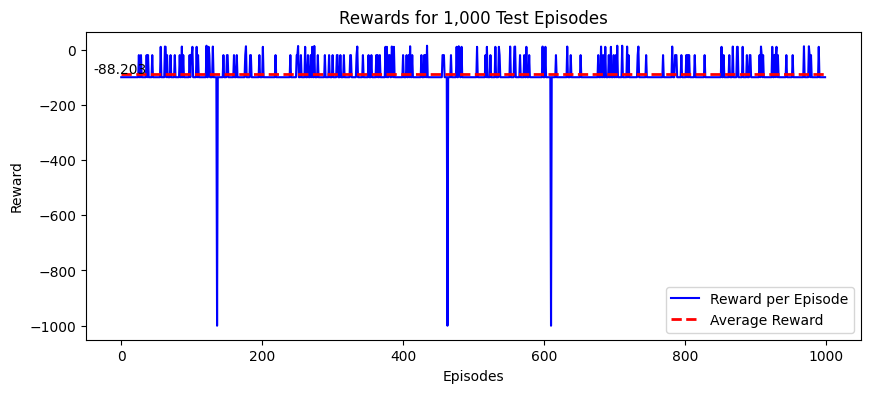

Episodes over 0 Reward: 55
Average reward: -88.203


In [18]:
# plot the histogram of distribution of rewards for 1,000 Test Episodes
mean = test_ext['Rewards'].mean()
mean = round(mean, 4)

plt.figure(figsize=(10,4))
plt.title("Rewards for 1,000 Test Episodes")
plt.xlabel("Episodes")
plt.ylabel("Reward")

plt.plot(test_ext['Rewards'], color='blue', label='Reward per Episode')
plt.hlines(y=mean, xmin=0, xmax=1000, linewidth=2, color='r', label='Average Reward', linestyles='dashed')
plt.text(-40, mean+1, mean)

plt.legend()
plt.show()

# print how many rewards are under 5
print("Episodes over 0 Reward:", len(test_ext[test_ext['Rewards'] > 0]))
print("Average reward:", mean)

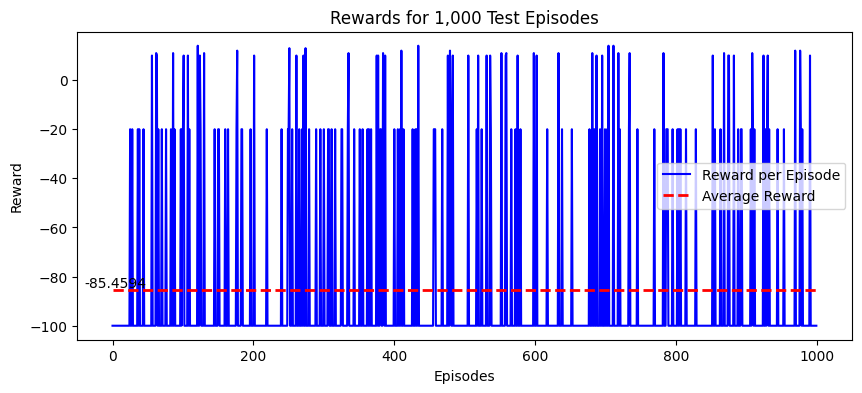

In [19]:
# plot the histogram of distribution of rewards for 1,000 Test Episodes
# remove the outliers with reward over -200
test_ext = test_ext[test_ext['Rewards'] > -200]
mean = test_ext['Rewards'].mean()
mean = round(mean, 4)

plt.figure(figsize=(10,4))
plt.title("Rewards for 1,000 Test Episodes")
plt.xlabel("Episodes")
plt.ylabel("Reward")

plt.plot(test_ext['Rewards'], color='blue', label='Reward per Episode')
plt.hlines(y=mean, xmin=0, xmax=1000, linewidth=2, color='r', label='Average Reward', linestyles='dashed')
plt.text(-40, mean+1, mean)

plt.legend()
plt.show()

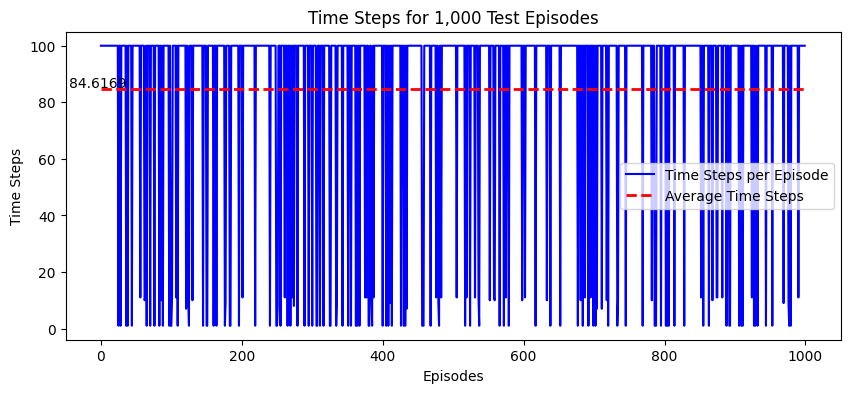

Episodes under 10 time steps: 116
Average time steps: 84.6169


In [20]:
# plot the number of timesteps of 1,000 Test Episodes
mean = test_ext['Timesteps'].mean()
mean = round(mean, 4)

plt.figure(figsize=(10,4))
plt.title("Time Steps for 1,000 Test Episodes")
plt.xlabel("Episodes")
plt.ylabel("Time Steps")

plt.plot(test_ext['Timesteps'], color='blue', label='Time Steps per Episode')
plt.hlines(y=mean, xmin=0, xmax=1000, linewidth=2, color='r', label='Average Time Steps', linestyles='dashed')
plt.text(-45, mean+0.5, mean)


plt.legend()
plt.show()

# print how many timesteps are under 10
print("Episodes under 10 time steps:", len(test_ext[test_ext['Timesteps'] < 10]))
print("Average time steps:", mean)

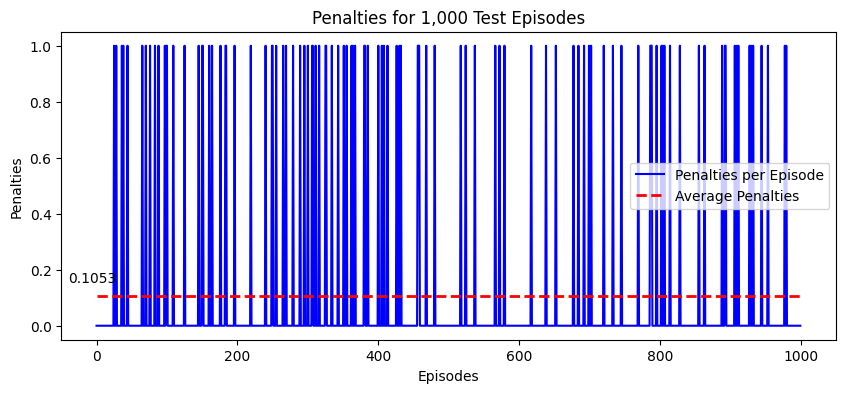

Episodes with no penalties: 892
Average penalties: 0.1053


In [21]:
# plot the number of penalties of 1,000 Test Episodes
mean = test_ext['Penalties'].mean()
mean = round(mean, 4)

plt.figure(figsize=(10,4))
plt.title("Penalties for 1,000 Test Episodes")
plt.xlabel("Episodes")
plt.ylabel("Penalties")

plt.plot(test_ext['Penalties'], color='blue', label='Penalties per Episode')
plt.hlines(y=mean, xmin=0, xmax=1000, linewidth=2, color='r', label='Average Penalties', linestyles='dashed')
plt.text(-40, mean+0.05, mean)

plt.legend()
plt.show()

# print how many timesteps are under 10
print("Episodes with no penalties:", len(test_ext[test_ext['Penalties'] < 1]))
print("Average penalties:", mean)